In [9]:
import os, json, re
import matplotlib.pyplot as plt

%matplotlib widget

def lmap(f, iter):
    return list(map(f, iter))


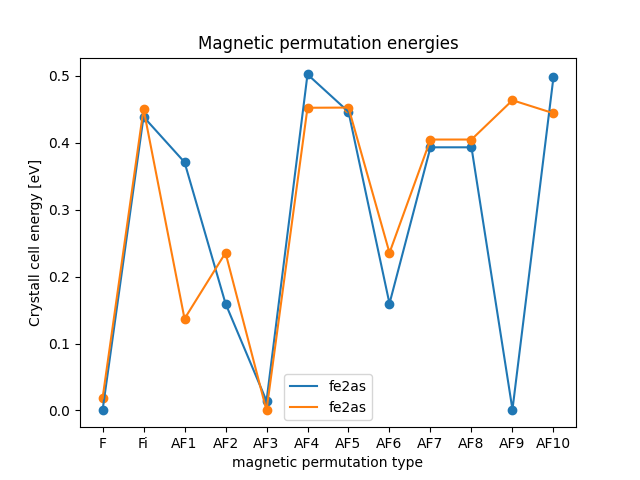

In [10]:
plt.figure()
plt.title("Magnetic permutation energies")
plt.xlabel("magnetic permutation type")
plt.ylabel("Crystall cell energy [eV]")

for mypath in [
    # "mn2as_mag_permuts_results",
    # "cr2as_mag_permuts_results",
    "fe2as_mag_permuts_results",
    "fe2as_mag_permuts_results_U=2"
]:
    mat = mypath.split("_")[0]

    onlyfiles = [
        f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))
    ]

    jsons = []
    for file in onlyfiles:
        with open(os.path.join(mypath, file), "r+") as reader:
            jsons.append(json.load(reader))

            jsons.sort(
                key=lambda d: float("0" + re.sub("\D", "", d["completion_date"]))
            )

    xs = []
    ys = []
    min_ene = min(lmap(lambda dat: dat["results"]["energy_per_cell_eV"], jsons))
    for dat in jsons:
        xs.append(dat["name"].split('_')[0])
        ys.append(float(dat["results"]["energy_per_cell_eV"]) - min_ene)

    plt.plot(xs, ys, label=mat)
    plt.scatter(xs, ys)

plt.legend()